<a href="https://colab.research.google.com/github/Danna-Bustacara/-Dimplomado_Ciencia_Datos/blob/main/PASAJEROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***SERIE PASAJEROS***





## Librerias y directorio

In [ ]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import datetime
import math
import scipy as sp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random
from statsmodels.datasets import sunspots
from statsmodels.tsa.deterministic import Seasonality
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
import scipy as sp
import scipy.stats
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.special import inv_boxcox
from pandas.core.frame import DataFrame
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
Pasajeros=Pasajeros2=pd.read_excel("/content/drive/Shareddrives/Eduardo/Pasajeros-metro.xlsx", names=['Fecha', 'NumPas'])
Pasajeros['Fecha']=pd.to_datetime(Pasajeros['Fecha'])
Pasajeros=Pasajeros.set_index('Fecha')
print(type(Pasajeros))

Pasajeros_ts=Pasajeros['NumPas']
print(type(Pasajeros_ts))
Pasajeros_ts.index.freq='D'


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


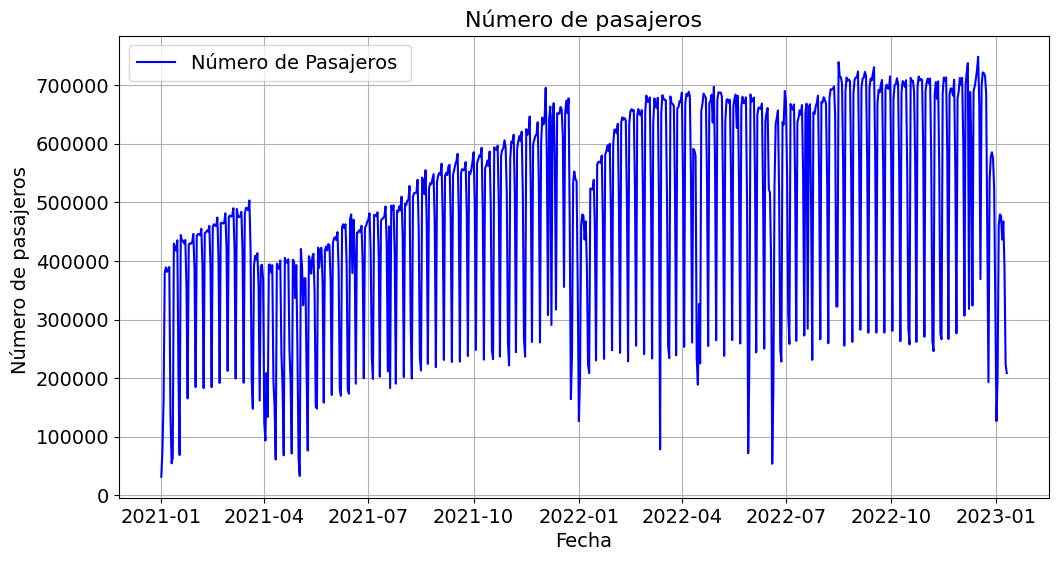

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Pasajeros_ts, color='b', label='Número de Pasajeros ')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de pasajeros ')
ax.set_title('Número de pasajeros')
ax.grid(True)
ax.legend(loc='upper left');

## Diferenciando

In [ ]:
##serie con tendencia determinística
resultadoadfxtrwlin=adfuller(Pasajeros,regression='c',autolag=None,maxlag=8)
print('ADF Statistic: %f' % resultadoadfxtrwlin[0])
print('P-value: %f' % resultadoadfxtrwlin[1])
for key, value in resultadoadfxtrwlin[4].items():
    print('\t%s: %.3f' % (key, value))

adfstat, pvalue, critvalues, resstore=adfuller(Pasajeros,regression='c',autolag=None,maxlag=8,store=True,regresults=True)####maxlag es importante se fija en 8 por los valores absolutos de t
resstore.resols.summary()

ADF Statistic: -2.786011
P-value: 0.060300
	1%: -3.439
	5%: -2.866
	10%: -2.569


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     196.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          2.44e-187
Time:                        22:29:00   Log-Likelihood:                -9420.0
No. Observations:                 731   AIC:                         1.886e+04
Df Residuals:                     721   BIC:                         1.891e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0973      0.035     -2.786      0.005      -0.166      -0.029
x2            -0.6309      0.048    -13.013      0.000      -0.726      -0.536
x3            -0.6244      0.053    -11.678      0.000      -0.729      -0.519
x4            -0.6025      0.053    -11.328      0.000      -0.707      -0.498
x5            -0.5977      0.051    -11.707      0.000      -0.698      -0.497
x6            -0.6348      0.049    -12.832      0.000      -0.732      -0.538
x7            -0.5548      0.048    -11.481      0.000      -0.650      -0.460
x8             0.1713      0.045      3.779      0.000       0.082       0.260
x9             0.0540      0.037      1.460      0.145      -0.019       0.127
const       4.864e+04   1.77e+04      2.746      0.006    1.39e+04    8.34e+04
==============================================================================
Omnibus:                      106.165   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1034.883
Skew:                          -0.253   Prob(JB):                    1.90e-225
Kurtosis:                       8.807   Cond. No.                     2.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

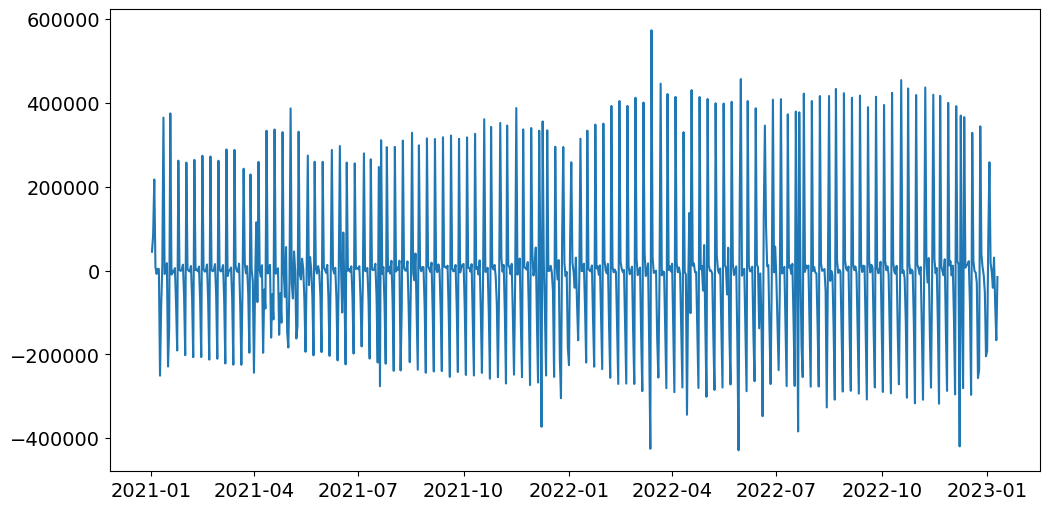

In [ ]:
#### Serie diferenciada ####
dif_Pasajeros=Pasajeros.diff(periods=1)[1:]
PasasinTend=dif_Pasajeros
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dif_Pasajeros, '-', label="Serie Diferenciada")

In [ ]:
seas_gen = Seasonality(7)
a=seas_gen.in_sample(Pasajeros.index).iloc[:,0:7]
PasTrans=pd.DataFrame(PasasinTend)

In [ ]:
dfPas=DataFrame()

for i in range(7,0,-1):
    dfPas[['t-'+str(i)]] = PasTrans.shift(i)


dfPas=pd.concat([dfPas, a],axis=1)
dfPas=dfPas.iloc[1:]

In [ ]:
dfPas['t'] = PasTrans.values
dfPas

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,"s(1,7)","s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)",t
Fecha,,,,,,,,,,,,,,,
2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,45051.0
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,45051.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,85736.0
2021-01-04,NaN,NaN,NaN,NaN,NaN,45051.0,85736.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,217596.0
2021-01-05,NaN,NaN,NaN,NaN,45051.0,85736.0,217596.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8789.0
2021-01-06,NaN,NaN,NaN,45051.0,85736.0,217596.0,8789.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-7750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-06,-52232.0,-204259.0,-191867.0,75317.0,258578.0,18782.0,-2122.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-40864.0
2023-01-07,-204259.0,-191867.0,75317.0,258578.0,18782.0,-2122.0,-40864.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31159.0
2023-01-08,-191867.0,75317.0,258578.0,18782.0,-2122.0,-40864.0,31159.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-77618.0


In [ ]:
dfPas_PRES = dfPas[7:]
print(dfPas_PRES.head(7))
dfPas_PRES.shape

PRESsplitPas = dfPas_PRES.values
XPas= PRESsplitPas[:, 0:-1]
yPas =PRESsplitPas[:,-1]

                 t-7       t-6       t-5       t-4       t-3       t-2  \
Fecha                                                                    
2021-01-09   45051.0   85736.0  217596.0    8789.0   -7750.0    4516.0   
2021-01-10   85736.0  217596.0    8789.0   -7750.0    4516.0    3850.0   
2021-01-11  217596.0    8789.0   -7750.0    4516.0    3850.0 -250656.0   
2021-01-12    8789.0   -7750.0    4516.0    3850.0 -250656.0  -84364.0   
2021-01-13   -7750.0    4516.0    3850.0 -250656.0  -84364.0    9749.0   
2021-01-14    4516.0    3850.0 -250656.0  -84364.0    9749.0  365295.0   
2021-01-15    3850.0 -250656.0  -84364.0    9749.0  365295.0   -7911.0   

                 t-1  s(1,7)  s(2,7)  s(3,7)  s(4,7)  s(5,7)  s(6,7)  s(7,7)  \
Fecha                                                                          
2021-01-09    3850.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
2021-01-10 -250656.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
2021-01-11  -

(732, 15)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

XPas_train_full, XPas_test, yPas_train_full, yPas_test=train_test_split(XPas,yPas,test_size=0.15, train_size=0.85,shuffle=False)
XPas_train, XPas_val, yPas_train, yPas_val=train_test_split(XPas_train_full,yPas_train_full,test_size=0.15, train_size=0.85,shuffle=False)

scaler=MinMaxScaler()
XPas_train=scaler.fit_transform(XPas_train)
XPas_val=scaler.transform(XPas_val)
XPas_test=scaler.transform(XPas_test)
XPas_train_full=scaler.transform(XPas_train_full)

print('Observations for feature: %d' % (len(Pasajeros)))
print('Training Observations for feature: %d' % (len(XPas_train)))
print('Validation Observations for feature: %d' % (len(XPas_val)))
print('Testing Observations for feature: %d' % (len(XPas_test)))

Observations for feature: 740
Training Observations for feature: 528
Validation Observations for feature: 94
Testing Observations for feature: 110


In [ ]:
decision_tree_Pas = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_Pas.fit(XPas_train, yPas_train)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_Pas.score(XPas_train, yPas_train))
print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_Pas.score(XPas_val,yPas_val))
print("el RECM es:",(((decision_tree_Pas.predict(XPas_val)-yPas_val)**2).sum())**0.5)



DecisionTreeRegressor()

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de validación: 0.7458873045321738
el RECM es: 994926.5372679533


In [ ]:
from sklearn.metrics import mean_squared_error
for d in [2, 3, 4, 5,6,7,8,9,10, 11, 12]:
    # Create the tree and fit it
    decision_tree_Pas = DecisionTreeRegressor(max_depth=d)
    decision_tree_Pas.fit(XPas_train, yPas_train)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_Pas.score(XPas_train, yPas_train))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_Pas.score(XPas_val, yPas_val))
    print("el RECM sobre el conjunto de validación es:", mean_squared_error(decision_tree_Pas.predict(XPas_val),yPas_val, squared=False), '\n')

DecisionTreeRegressor(max_depth=2)

max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.659005554322623
Coeficiente R2 sobre el conjunto de validación: 0.5830451215320158
el RECM sobre el conjunto de validación es: 131449.3479917315 



DecisionTreeRegressor(max_depth=3)

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7340707152454141
Coeficiente R2 sobre el conjunto de validación: 0.658543489679939
el RECM sobre el conjunto de validación es: 118954.69978723857 



DecisionTreeRegressor(max_depth=4)

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8364454401591288
Coeficiente R2 sobre el conjunto de validación: 0.7461390688945801
el RECM sobre el conjunto de validación es: 102567.98905044032 



DecisionTreeRegressor(max_depth=5)

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.888373122798452
Coeficiente R2 sobre el conjunto de validación: 0.7687192718281679
el RECM sobre el conjunto de validación es: 97900.21138204704 



DecisionTreeRegressor(max_depth=6)

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9228291740569855
Coeficiente R2 sobre el conjunto de validación: 0.7608126471419048
el RECM sobre el conjunto de validación es: 99559.57011385338 



DecisionTreeRegressor(max_depth=7)

max_depth= 7
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9475477881073007
Coeficiente R2 sobre el conjunto de validación: 0.7799417027804525
el RECM sobre el conjunto de validación es: 95495.47220813575 



DecisionTreeRegressor(max_depth=8)

max_depth= 8
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9733369394705437
Coeficiente R2 sobre el conjunto de validación: 0.7622389550435482
el RECM sobre el conjunto de validación es: 99262.28238361233 



DecisionTreeRegressor(max_depth=9)

max_depth= 9
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9912571050697694
Coeficiente R2 sobre el conjunto de validación: 0.7198250259758623
el RECM sobre el conjunto de validación es: 107752.80307219777 



DecisionTreeRegressor(max_depth=10)

max_depth= 10
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9961347305424166
Coeficiente R2 sobre el conjunto de validación: 0.5886762215671857
el RECM sobre el conjunto de validación es: 130558.69931882386 



DecisionTreeRegressor(max_depth=11)

max_depth= 11
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9981256563279944
Coeficiente R2 sobre el conjunto de validación: 0.7467346244354158
el RECM sobre el conjunto de validación es: 102447.60659892987 



DecisionTreeRegressor(max_depth=12)

max_depth= 12
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9991470347461785
Coeficiente R2 sobre el conjunto de validación: 0.6400577639713855
el RECM sobre el conjunto de validación es: 122132.23695246245 



In [ ]:
path=decision_tree_Pas.cost_complexity_pruning_path(XPas_train, yPas_train)
alphas=path['ccp_alphas']
print(alphas)
print(alphas.min())

print(alphas.max())
div=20

[0.00000000e+00 2.42424242e-01 1.91761364e+00 1.50340909e+01
 2.64100379e+01 3.06818182e+01 9.21818182e+01 1.10114583e+02
 2.05640152e+02 2.58034091e+02 5.25591856e+02 5.89508523e+02
 7.43367424e+02 8.82444444e+02 9.58367424e+02 1.02818561e+03
 1.04006061e+03 1.24584186e+03 1.29055682e+03 1.52736742e+03
 3.02740909e+03 3.14709186e+03 3.29377367e+03 3.57136742e+03
 3.76518561e+03 3.77891414e+03 4.57729293e+03 5.32801515e+03
 5.89636490e+03 6.88807670e+03 8.12964015e+03 8.24890909e+03
 1.07865767e+04 1.18381869e+04 1.21220988e+04 1.23342806e+04
 1.23820606e+04 1.27407424e+04 1.48200152e+04 1.51515152e+04
 1.57922994e+04 1.99943419e+04 2.13390237e+04 2.24223068e+04
 2.36964568e+04 2.58016670e+04 2.58429697e+04 3.15909141e+04
 3.59236818e+04 3.74206263e+04 3.77431440e+04 3.79586982e+04
 4.18091045e+04 4.31363952e+04 4.40166682e+04 4.60931364e+04
 4.85782727e+04 4.86555152e+04 5.18268374e+04 5.21706869e+04
 5.29300800e+04 5.31153764e+04 5.52832364e+04 5.86225606e+04
 5.97830316e+04 6.079510

In [ ]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeRegressor(ccp_alpha=i)

    tree.fit(XPas_train, yPas_train)
    y_train_pred=tree.predict(XPas_train)
    y_test_pred=tree.predict(XPas_test)


    accuracy_train.append(mean_squared_error(y_train_pred, yPas_train, squared=False))
    accuracy_test.append(mean_squared_error(y_test_pred, yPas_test,squared=False))

DecisionTreeRegressor()

DecisionTreeRegressor(ccp_alpha=0.24242424242424243)

DecisionTreeRegressor(ccp_alpha=1.9176136363636365)

DecisionTreeRegressor(ccp_alpha=15.034090909090908)

DecisionTreeRegressor(ccp_alpha=26.41003787878788)

DecisionTreeRegressor(ccp_alpha=30.681818181818183)

DecisionTreeRegressor(ccp_alpha=92.18181818181819)

DecisionTreeRegressor(ccp_alpha=110.11458333333333)

DecisionTreeRegressor(ccp_alpha=205.6401515151515)

DecisionTreeRegressor(ccp_alpha=258.03409090909093)

DecisionTreeRegressor(ccp_alpha=525.591856060606)

DecisionTreeRegressor(ccp_alpha=589.5085227272727)

DecisionTreeRegressor(ccp_alpha=743.3674242424242)

DecisionTreeRegressor(ccp_alpha=882.4444444444539)

DecisionTreeRegressor(ccp_alpha=958.3674242424242)

DecisionTreeRegressor(ccp_alpha=1028.185606060606)

DecisionTreeRegressor(ccp_alpha=1040.060606060606)

DecisionTreeRegressor(ccp_alpha=1245.841856060606)

DecisionTreeRegressor(ccp_alpha=1290.556818181818)

DecisionTreeRegressor(ccp_alpha=1527.3674242424242)

DecisionTreeRegressor(ccp_alpha=3027.409090909091)

DecisionTreeRegressor(ccp_alpha=3147.091856060606)

DecisionTreeRegressor(ccp_alpha=3293.773674242424)

DecisionTreeRegressor(ccp_alpha=3571.367424242424)

DecisionTreeRegressor(ccp_alpha=3765.185606060606)

DecisionTreeRegressor(ccp_alpha=3778.9141414237747)

DecisionTreeRegressor(ccp_alpha=4577.292929331462)

DecisionTreeRegressor(ccp_alpha=5328.015151515152)

DecisionTreeRegressor(ccp_alpha=5896.364899144028)

DecisionTreeRegressor(ccp_alpha=6888.076704545455)

DecisionTreeRegressor(ccp_alpha=8129.640151515152)

DecisionTreeRegressor(ccp_alpha=8248.909090894642)

DecisionTreeRegressor(ccp_alpha=10786.576704545454)

DecisionTreeRegressor(ccp_alpha=11838.186868696503)

DecisionTreeRegressor(ccp_alpha=12122.098800505053)

DecisionTreeRegressor(ccp_alpha=12334.28061868685)

DecisionTreeRegressor(ccp_alpha=12382.060606060606)

DecisionTreeRegressor(ccp_alpha=12740.742424242424)

DecisionTreeRegressor(ccp_alpha=14820.015151515152)

DecisionTreeRegressor(ccp_alpha=15151.515151515152)

DecisionTreeRegressor(ccp_alpha=15792.299400242891)

DecisionTreeRegressor(ccp_alpha=19994.341856060608)

DecisionTreeRegressor(ccp_alpha=21339.023674242424)

DecisionTreeRegressor(ccp_alpha=22422.30681818182)

DecisionTreeRegressor(ccp_alpha=23696.456818181767)

DecisionTreeRegressor(ccp_alpha=25801.666982390663)

DecisionTreeRegressor(ccp_alpha=25842.969696969696)

DecisionTreeRegressor(ccp_alpha=31590.914141438225)

DecisionTreeRegressor(ccp_alpha=35923.68181818182)

DecisionTreeRegressor(ccp_alpha=37420.62626262957)

DecisionTreeRegressor(ccp_alpha=37743.14400245204)

DecisionTreeRegressor(ccp_alpha=37958.69823241956)

DecisionTreeRegressor(ccp_alpha=41809.10454533316)

DecisionTreeRegressor(ccp_alpha=43136.39520205873)

DecisionTreeRegressor(ccp_alpha=44016.66824494947)

DecisionTreeRegressor(ccp_alpha=46093.13636363682)

DecisionTreeRegressor(ccp_alpha=48578.272727272735)

DecisionTreeRegressor(ccp_alpha=48655.51515151515)

DecisionTreeRegressor(ccp_alpha=51826.83737373352)

DecisionTreeRegressor(ccp_alpha=52170.6868686965)

DecisionTreeRegressor(ccp_alpha=52930.08001893939)

DecisionTreeRegressor(ccp_alpha=53115.376420454544)

DecisionTreeRegressor(ccp_alpha=55283.2363635988)

DecisionTreeRegressor(ccp_alpha=58622.56060606061)

DecisionTreeRegressor(ccp_alpha=59783.031565656565)

DecisionTreeRegressor(ccp_alpha=60795.10227272908)

DecisionTreeRegressor(ccp_alpha=63000.10653409091)

DecisionTreeRegressor(ccp_alpha=64404.247474748074)

DecisionTreeRegressor(ccp_alpha=64672.06060606061)

DecisionTreeRegressor(ccp_alpha=65077.90972222225)

DecisionTreeRegressor(ccp_alpha=66138.13920454546)

DecisionTreeRegressor(ccp_alpha=67616.00378787878)

DecisionTreeRegressor(ccp_alpha=69542.62642042566)

DecisionTreeRegressor(ccp_alpha=76142.30454545458)

DecisionTreeRegressor(ccp_alpha=80885.00378787878)

DecisionTreeRegressor(ccp_alpha=82534.27891414147)

DecisionTreeRegressor(ccp_alpha=100334.4669191765)

DecisionTreeRegressor(ccp_alpha=108580.74242424243)

DecisionTreeRegressor(ccp_alpha=110577.30681818182)

DecisionTreeRegressor(ccp_alpha=114979.50852272728)

DecisionTreeRegressor(ccp_alpha=115063.0009469697)

DecisionTreeRegressor(ccp_alpha=118646.89457063962)

DecisionTreeRegressor(ccp_alpha=119106.88920454556)

DecisionTreeRegressor(ccp_alpha=123424.96431277055)

DecisionTreeRegressor(ccp_alpha=127299.93471074375)

DecisionTreeRegressor(ccp_alpha=137600.40410052953)

DecisionTreeRegressor(ccp_alpha=141467.4558080808)

DecisionTreeRegressor(ccp_alpha=145350.4433396368)

DecisionTreeRegressor(ccp_alpha=154352.54640151514)

DecisionTreeRegressor(ccp_alpha=156585.11458333334)

DecisionTreeRegressor(ccp_alpha=178412.00378787878)

DecisionTreeRegressor(ccp_alpha=182595.64015151514)

DecisionTreeRegressor(ccp_alpha=183653.49494948532)

DecisionTreeRegressor(ccp_alpha=185283.0127840909)

DecisionTreeRegressor(ccp_alpha=185456.28835227274)

DecisionTreeRegressor(ccp_alpha=188089.37547348486)

DecisionTreeRegressor(ccp_alpha=191004.5681818182)

DecisionTreeRegressor(ccp_alpha=191673.79640151514)

DecisionTreeRegressor(ccp_alpha=203070.8491161583)

DecisionTreeRegressor(ccp_alpha=237750.02367424243)

DecisionTreeRegressor(ccp_alpha=245833.53819444482)

DecisionTreeRegressor(ccp_alpha=255505.1856060606)

DecisionTreeRegressor(ccp_alpha=261367.3646106142)

DecisionTreeRegressor(ccp_alpha=274601.6944970541)

DecisionTreeRegressor(ccp_alpha=307016.3573454944)

DecisionTreeRegressor(ccp_alpha=314157.0037878788)

DecisionTreeRegressor(ccp_alpha=316174.0157828276)

DecisionTreeRegressor(ccp_alpha=333889.4328563903)

DecisionTreeRegressor(ccp_alpha=364306.0617424259)

DecisionTreeRegressor(ccp_alpha=369321.7943947243)

DecisionTreeRegressor(ccp_alpha=395641.92387768714)

DecisionTreeRegressor(ccp_alpha=414834.1856060606)

DecisionTreeRegressor(ccp_alpha=420817.2730372458)

DecisionTreeRegressor(ccp_alpha=421106.9341855916)

DecisionTreeRegressor(ccp_alpha=450259.11363637814)

DecisionTreeRegressor(ccp_alpha=456546.73484848486)

DecisionTreeRegressor(ccp_alpha=468000.11688303226)

DecisionTreeRegressor(ccp_alpha=470040.2660038399)

DecisionTreeRegressor(ccp_alpha=486582.30340909073)

DecisionTreeRegressor(ccp_alpha=488711.12727272895)

DecisionTreeRegressor(ccp_alpha=542565.8715277779)

DecisionTreeRegressor(ccp_alpha=563926.5236742424)

DecisionTreeRegressor(ccp_alpha=575353.4100378788)

DecisionTreeRegressor(ccp_alpha=588451.8787878787)

DecisionTreeRegressor(ccp_alpha=620316.837121241)

DecisionTreeRegressor(ccp_alpha=639262.5956833959)

DecisionTreeRegressor(ccp_alpha=652005.921306863)

DecisionTreeRegressor(ccp_alpha=666159.002840938)

DecisionTreeRegressor(ccp_alpha=689437.7955597641)

DecisionTreeRegressor(ccp_alpha=701934.5654336757)

DecisionTreeRegressor(ccp_alpha=728038.9400252537)

DecisionTreeRegressor(ccp_alpha=776189.9444444252)

DecisionTreeRegressor(ccp_alpha=810184.1013684417)

DecisionTreeRegressor(ccp_alpha=834420.395454545)

DecisionTreeRegressor(ccp_alpha=853466.3267045454)

DecisionTreeRegressor(ccp_alpha=896380.9789445642)

DecisionTreeRegressor(ccp_alpha=925426.9636363115)

DecisionTreeRegressor(ccp_alpha=985058.2012984826)

DecisionTreeRegressor(ccp_alpha=1055765.7768196338)

DecisionTreeRegressor(ccp_alpha=1071189.5568181672)

DecisionTreeRegressor(ccp_alpha=1081288.3576859417)

DecisionTreeRegressor(ccp_alpha=1215580.3637014448)

DecisionTreeRegressor(ccp_alpha=1246348.7377025464)

DecisionTreeRegressor(ccp_alpha=1254472.121527778)

DecisionTreeRegressor(ccp_alpha=1275854.7272727236)

DecisionTreeRegressor(ccp_alpha=1277214.6272727274)

DecisionTreeRegressor(ccp_alpha=1278522.8956611808)

DecisionTreeRegressor(ccp_alpha=1352404.4545454257)

DecisionTreeRegressor(ccp_alpha=1371145.3735794877)

DecisionTreeRegressor(ccp_alpha=1463822.2453362)

DecisionTreeRegressor(ccp_alpha=1514091.0946969697)

DecisionTreeRegressor(ccp_alpha=1601091.9191919186)

DecisionTreeRegressor(ccp_alpha=1602200.4630681819)

DecisionTreeRegressor(ccp_alpha=1649802.188683886)

DecisionTreeRegressor(ccp_alpha=1801495.7502817912)

DecisionTreeRegressor(ccp_alpha=1813802.2964015151)

DecisionTreeRegressor(ccp_alpha=1881133.020292208)

DecisionTreeRegressor(ccp_alpha=1910631.3674242424)

DecisionTreeRegressor(ccp_alpha=2092123.1145833333)

DecisionTreeRegressor(ccp_alpha=2106207.989411141)

DecisionTreeRegressor(ccp_alpha=2141099.5501893945)

DecisionTreeRegressor(ccp_alpha=2159240.53125)

DecisionTreeRegressor(ccp_alpha=2252079.336742423)

DecisionTreeRegressor(ccp_alpha=2437918.070502123)

DecisionTreeRegressor(ccp_alpha=2646066.818181789)

DecisionTreeRegressor(ccp_alpha=2704416.8030381636)

DecisionTreeRegressor(ccp_alpha=2797818.9337644028)

DecisionTreeRegressor(ccp_alpha=3005099.031653058)

DecisionTreeRegressor(ccp_alpha=3267459.333451705)

DecisionTreeRegressor(ccp_alpha=3329278.036390666)

DecisionTreeRegressor(ccp_alpha=3912082.7891415106)

DecisionTreeRegressor(ccp_alpha=3933185.6060606637)

DecisionTreeRegressor(ccp_alpha=3966402.5858585853)

DecisionTreeRegressor(ccp_alpha=4092611.260774399)

DecisionTreeRegressor(ccp_alpha=4363762.743859407)

DecisionTreeRegressor(ccp_alpha=4515870.285822528)

DecisionTreeRegressor(ccp_alpha=5162731.192637268)

DecisionTreeRegressor(ccp_alpha=5577837.176001433)

DecisionTreeRegressor(ccp_alpha=5599454.701731581)

DecisionTreeRegressor(ccp_alpha=6073281.3387783505)

DecisionTreeRegressor(ccp_alpha=6246651.332501534)

DecisionTreeRegressor(ccp_alpha=6533073.563345186)

DecisionTreeRegressor(ccp_alpha=7350450.570501896)

DecisionTreeRegressor(ccp_alpha=7365272.8181818165)

DecisionTreeRegressor(ccp_alpha=7760442.626751028)

DecisionTreeRegressor(ccp_alpha=8753416.57419733)

DecisionTreeRegressor(ccp_alpha=8799934.584020441)

DecisionTreeRegressor(ccp_alpha=9630825.733910184)

DecisionTreeRegressor(ccp_alpha=10043091.666666668)

DecisionTreeRegressor(ccp_alpha=10044773.47364258)

DecisionTreeRegressor(ccp_alpha=10412650.686868686)

DecisionTreeRegressor(ccp_alpha=10874270.203234293)

DecisionTreeRegressor(ccp_alpha=11427972.338142797)

DecisionTreeRegressor(ccp_alpha=11990587.455667825)

DecisionTreeRegressor(ccp_alpha=12562441.705443671)

DecisionTreeRegressor(ccp_alpha=13104885.310668945)

DecisionTreeRegressor(ccp_alpha=14075987.273674242)

DecisionTreeRegressor(ccp_alpha=14094843.892341983)

DecisionTreeRegressor(ccp_alpha=14608188.709343476)

DecisionTreeRegressor(ccp_alpha=14867362.435200192)

DecisionTreeRegressor(ccp_alpha=15953987.959595958)

DecisionTreeRegressor(ccp_alpha=18746910.00194805)

DecisionTreeRegressor(ccp_alpha=19352480.948749423)

DecisionTreeRegressor(ccp_alpha=20377297.484378006)

DecisionTreeRegressor(ccp_alpha=22355768.619547088)

DecisionTreeRegressor(ccp_alpha=22960729.27834014)

DecisionTreeRegressor(ccp_alpha=28994270.667929295)

DecisionTreeRegressor(ccp_alpha=29454224.83284512)

DecisionTreeRegressor(ccp_alpha=29780356.90909091)

DecisionTreeRegressor(ccp_alpha=30280811.40946971)

DecisionTreeRegressor(ccp_alpha=32601989.02303078)

DecisionTreeRegressor(ccp_alpha=33263302.197601013)

DecisionTreeRegressor(ccp_alpha=35719150.96023126)

DecisionTreeRegressor(ccp_alpha=36931764.05733457)

DecisionTreeRegressor(ccp_alpha=37716202.623500735)

DecisionTreeRegressor(ccp_alpha=38744254.69696969)

DecisionTreeRegressor(ccp_alpha=38915695.60669192)

DecisionTreeRegressor(ccp_alpha=44073002.826345846)

DecisionTreeRegressor(ccp_alpha=47762669.12262366)

DecisionTreeRegressor(ccp_alpha=51063055.15151507)

DecisionTreeRegressor(ccp_alpha=62709100.28421425)

DecisionTreeRegressor(ccp_alpha=65630489.196245395)

DecisionTreeRegressor(ccp_alpha=69422622.43511385)

DecisionTreeRegressor(ccp_alpha=73149807.4090909)

DecisionTreeRegressor(ccp_alpha=73736715.75876945)

DecisionTreeRegressor(ccp_alpha=77503189.95961398)

DecisionTreeRegressor(ccp_alpha=94206653.69355024)

DecisionTreeRegressor(ccp_alpha=101406499.39246017)

DecisionTreeRegressor(ccp_alpha=105304960.449248)

DecisionTreeRegressor(ccp_alpha=119589851.80742437)

DecisionTreeRegressor(ccp_alpha=120209041.88898599)

DecisionTreeRegressor(ccp_alpha=122466780.1620729)

DecisionTreeRegressor(ccp_alpha=129215607.6824495)

DecisionTreeRegressor(ccp_alpha=130936855.43755144)

DecisionTreeRegressor(ccp_alpha=182396168.90909094)

DecisionTreeRegressor(ccp_alpha=183655279.21822384)

DecisionTreeRegressor(ccp_alpha=214119278.85889596)

DecisionTreeRegressor(ccp_alpha=251935075.78748107)

DecisionTreeRegressor(ccp_alpha=267794884.67987657)

DecisionTreeRegressor(ccp_alpha=272629531.7460318)

DecisionTreeRegressor(ccp_alpha=351318237.64689946)

DecisionTreeRegressor(ccp_alpha=397739265.36473155)

DecisionTreeRegressor(ccp_alpha=597691118.3338575)

DecisionTreeRegressor(ccp_alpha=1143492337.7873912)

DecisionTreeRegressor(ccp_alpha=1226720079.1443472)

DecisionTreeRegressor(ccp_alpha=5544678254.379044)

DecisionTreeRegressor(ccp_alpha=12489864378.900343)

<Figure size 1400x700 with 0 Axes>

<Axes: >

<Axes: >

([<matplotlib.axis.XTick at 0x7f34d9605d80>,
 [Text(0.0, 0, '0.000'),
  Text(624493218.9450171, 0, '0.062'),
  Text(1248986437.8900342, 0, '0.125'),
  Text(1873479656.8350513, 0, '0.187'),
  Text(2497972875.7800684, 0, '0.250'),
  Text(3122466094.7250853, 0, '0.312'),
  Text(3746959313.6701026, 0, '0.375'),
  Text(4371452532.61512, 0, '0.437'),
  Text(4995945751.560137, 0, '0.500'),
  Text(5620438970.505154, 0, '0.562'),
  Text(6244932189.4501705, 0, '0.624'),
  Text(6869425408.395188, 0, '0.687'),
  Text(7493918627.340205, 0, '0.749'),
  Text(8118411846.285222, 0, '0.812'),
  Text(8742905065.23024, 0, '0.874'),
  Text(9367398284.175257, 0, '0.937'),
  Text(9991891503.120274, 0, '0.999'),
  Text(10616384722.06529, 0, '1.062'),
  Text(11240877941.010307, 0, '1.124'),
  Text(11865371159.955324, 0, '1.187')])

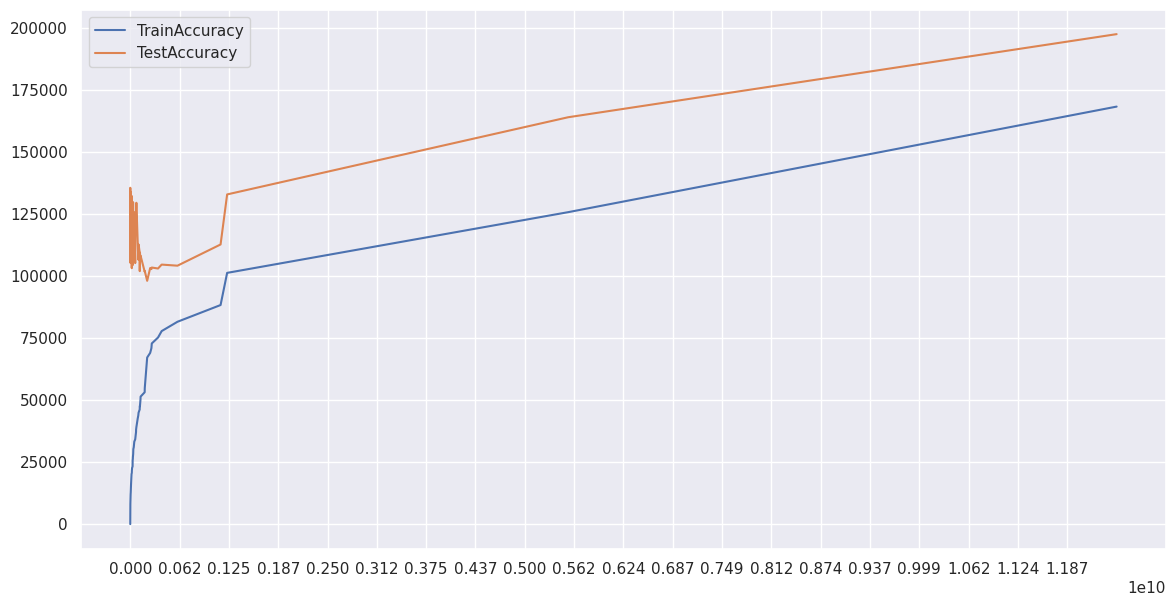

In [ ]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))

sns.lineplot(y=accuracy_train,x=alphas,label="TrainAccuracy")

sns.lineplot(y=accuracy_test,x=alphas,label="TestAccuracy")

plt.xticks(ticks=np.arange(0.00,alphas.max(),(alphas.max()-alphas.min())/div))
plt.show()

DecisionTreeRegressor(ccp_alpha=0.125, max_depth=4)

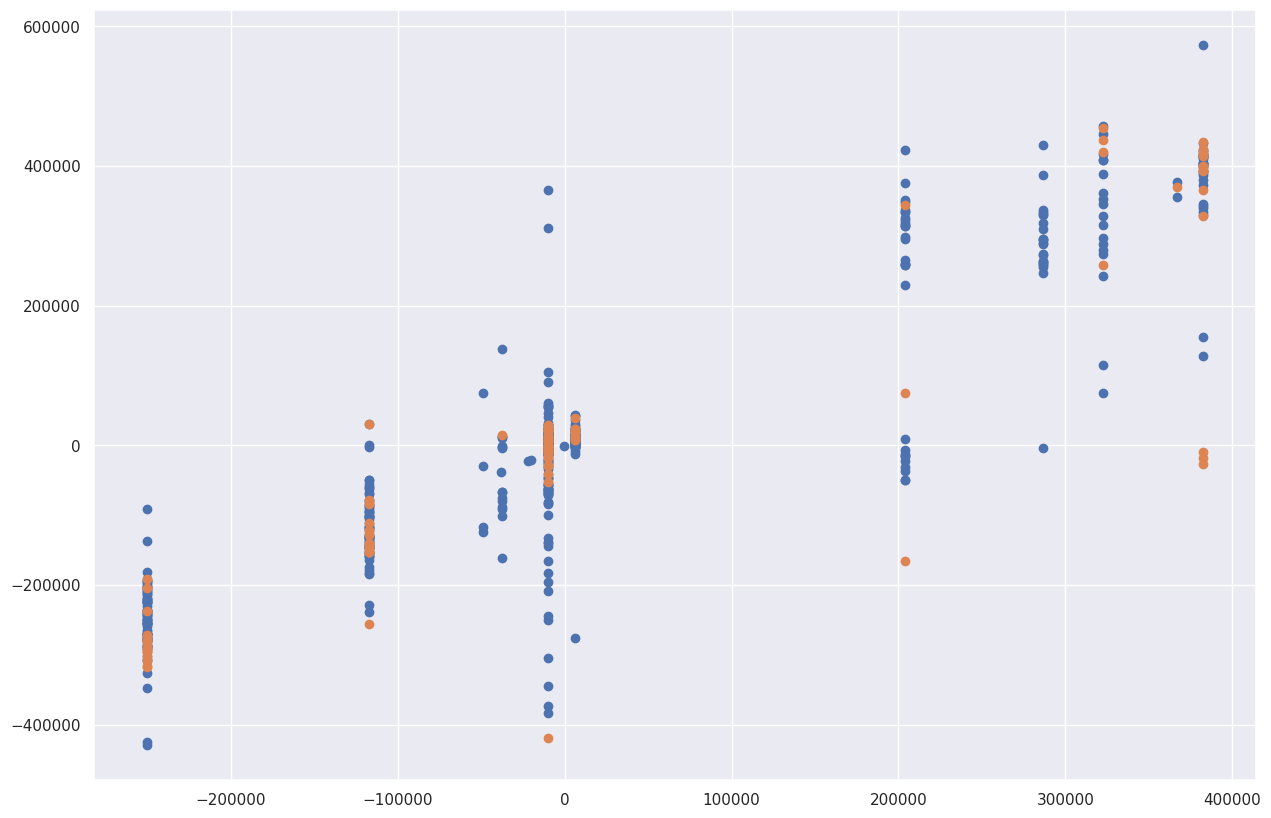

In [ ]:
decision_tree_Pas = DecisionTreeRegressor(max_depth=4,ccp_alpha=0.125)  # fill in best max depth here
decision_tree_Pas.fit(XPas_train_full, yPas_train_full)

# Predict values for train and test
train_prediction = decision_tree_Pas.predict(XPas_train_full)
test_prediction = decision_tree_Pas.predict(XPas_test)  #### val o test

# Scatter the predictions vs actual values
plt.scatter(train_prediction, yPas_train_full, label='train')  # blue
plt.scatter(test_prediction, yPas_test, label='test')  # orange
plt.show()

In [ ]:
from sklearn import tree

listacaract=list(dfPas_PRES.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_Pas)
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_0 <= 0.36
|   |   |--- feature_6 <= 0.38
|   |   |   |--- feature_5 <= 0.35
|   |   |   |   |--- value: [-48608.50]
|   |   |   |--- feature_5 >  0.35
|   |   |   |   |--- value: [-250363.39]
|   |   |--- feature_6 >  0.38
|   |   |   |--- feature_3 <= 0.42
|   |   |   |   |--- value: [-37570.67]
|   |   |   |--- feature_3 >  0.42
|   |   |   |   |--- value: [-117335.10]
|   |--- feature_0 >  0.36
|   |   |--- feature_5 <= 0.28
|   |   |   |--- feature_6 <= 0.62
|   |   |   |   |--- value: [322438.06]
|   |   |   |--- feature_6 >  0.62
|   |   |   |   |--- value: [6125.14]
|   |   |--- feature_5 >  0.28
|   |   |   |--- feature_6 <= 0.07
|   |   |   |   |--- value: [367011.50]
|   |   |   |--- feature_6 >  0.07
|   |   |   |   |--- value: [-10183.26]
|--- feature_10 >  0.50
|   |--- feature_6 <= 0.17
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_5 <= 0.35
|   |   |   |   |--- value: [382590.90]
|   |   |   |--- feature_5 >  0.35
|   | 

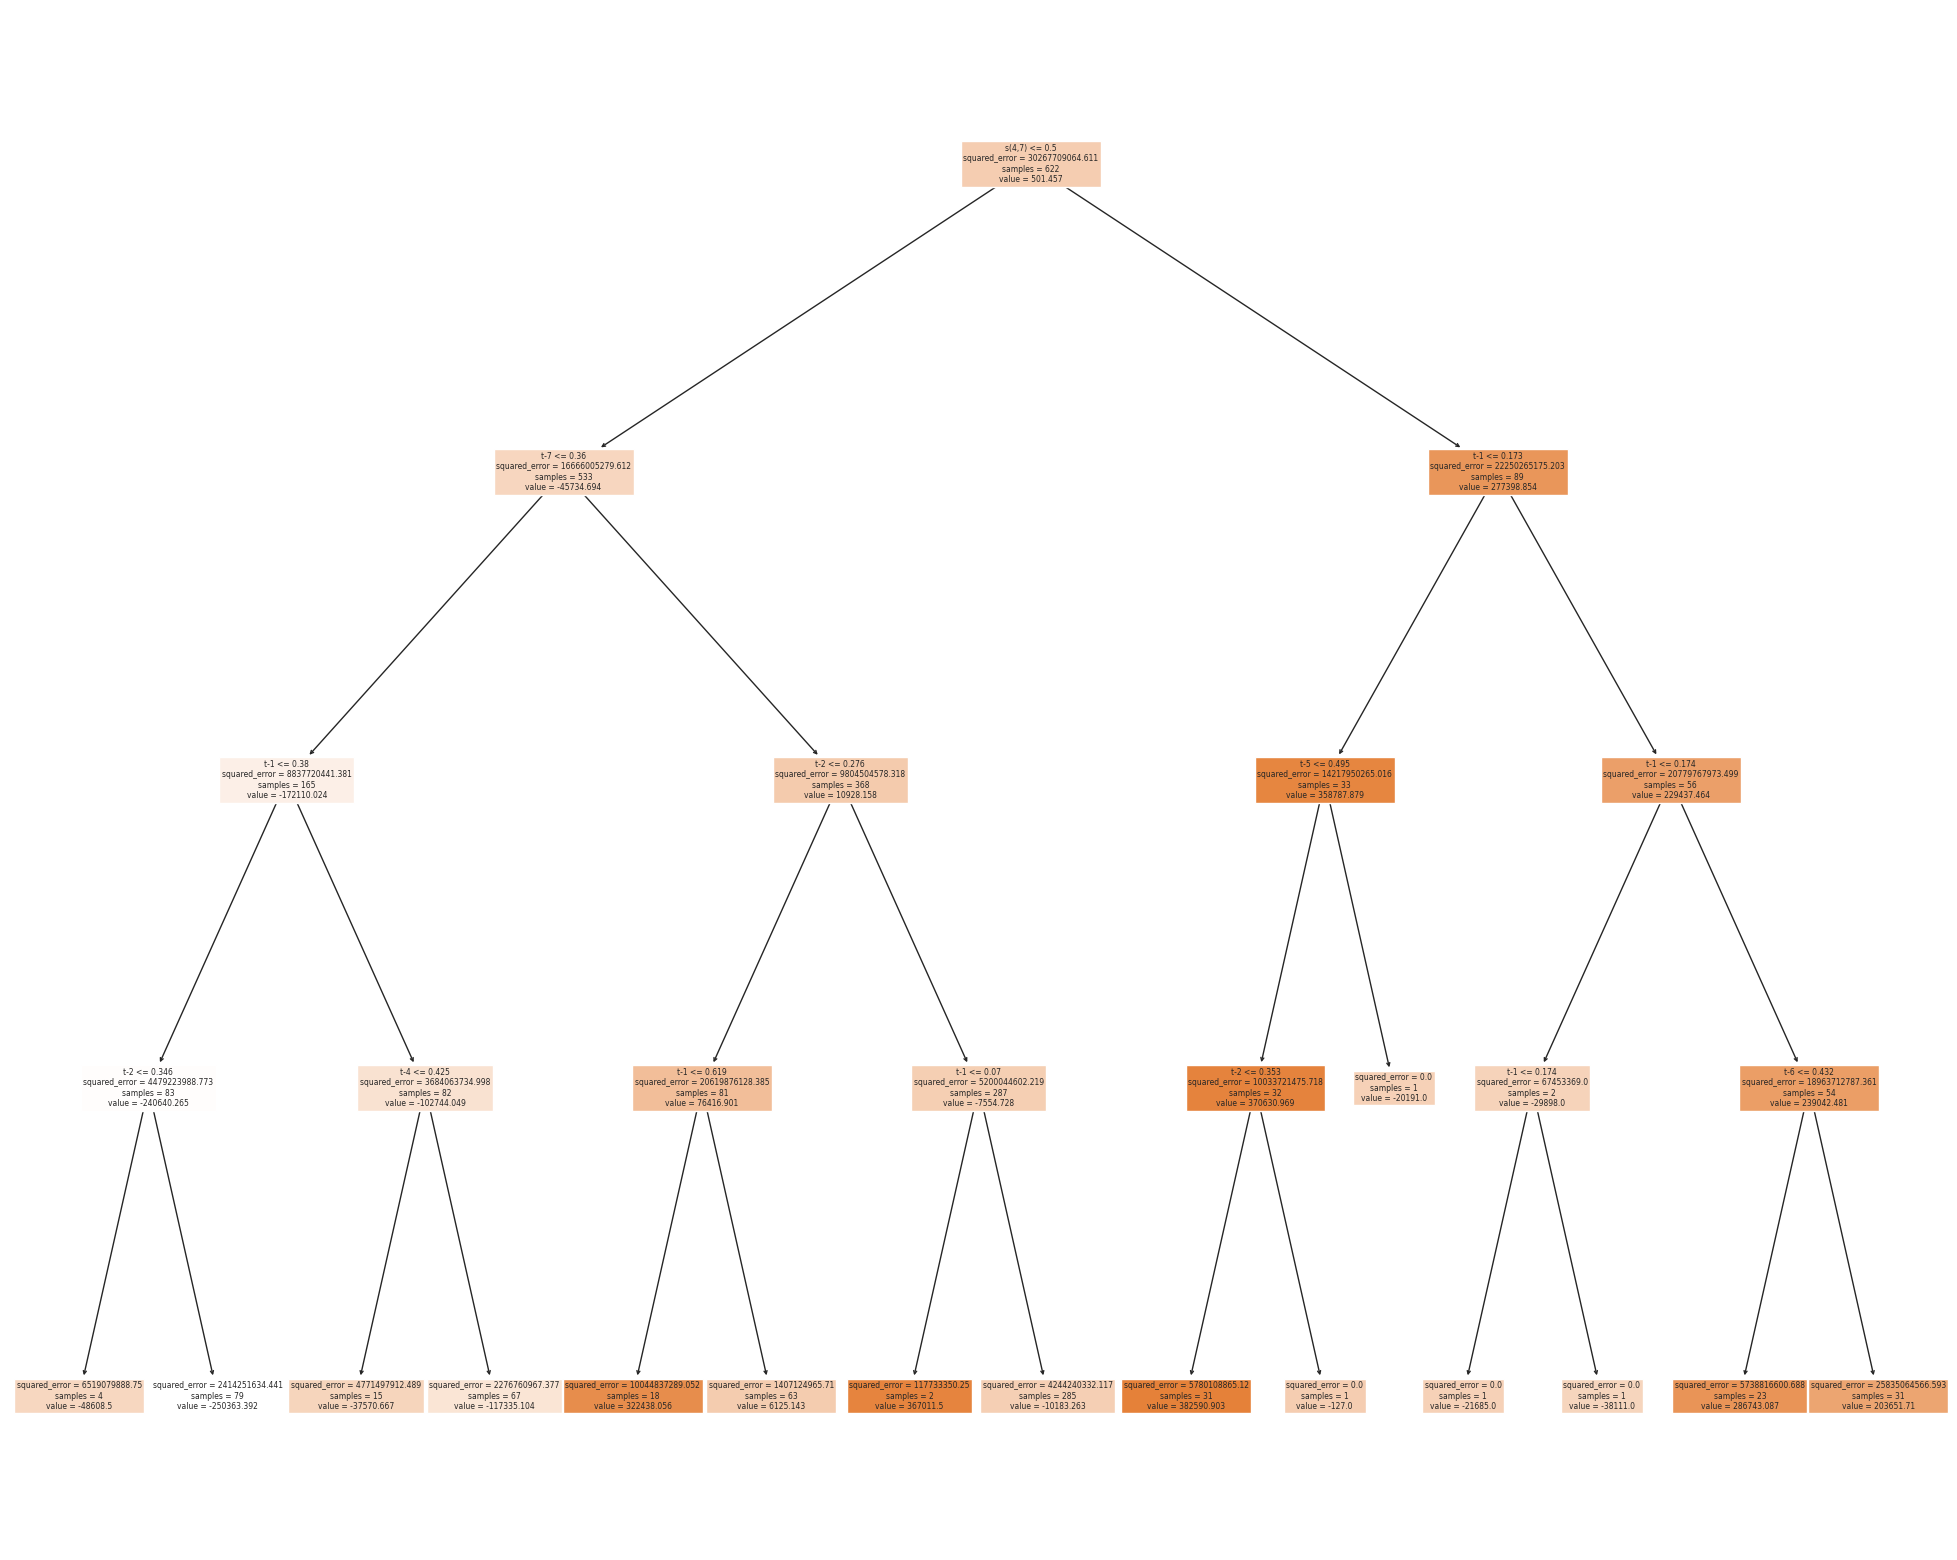

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_Pas,
                   feature_names=listacaract,
                   class_names=respuesta,
                   filled=True)

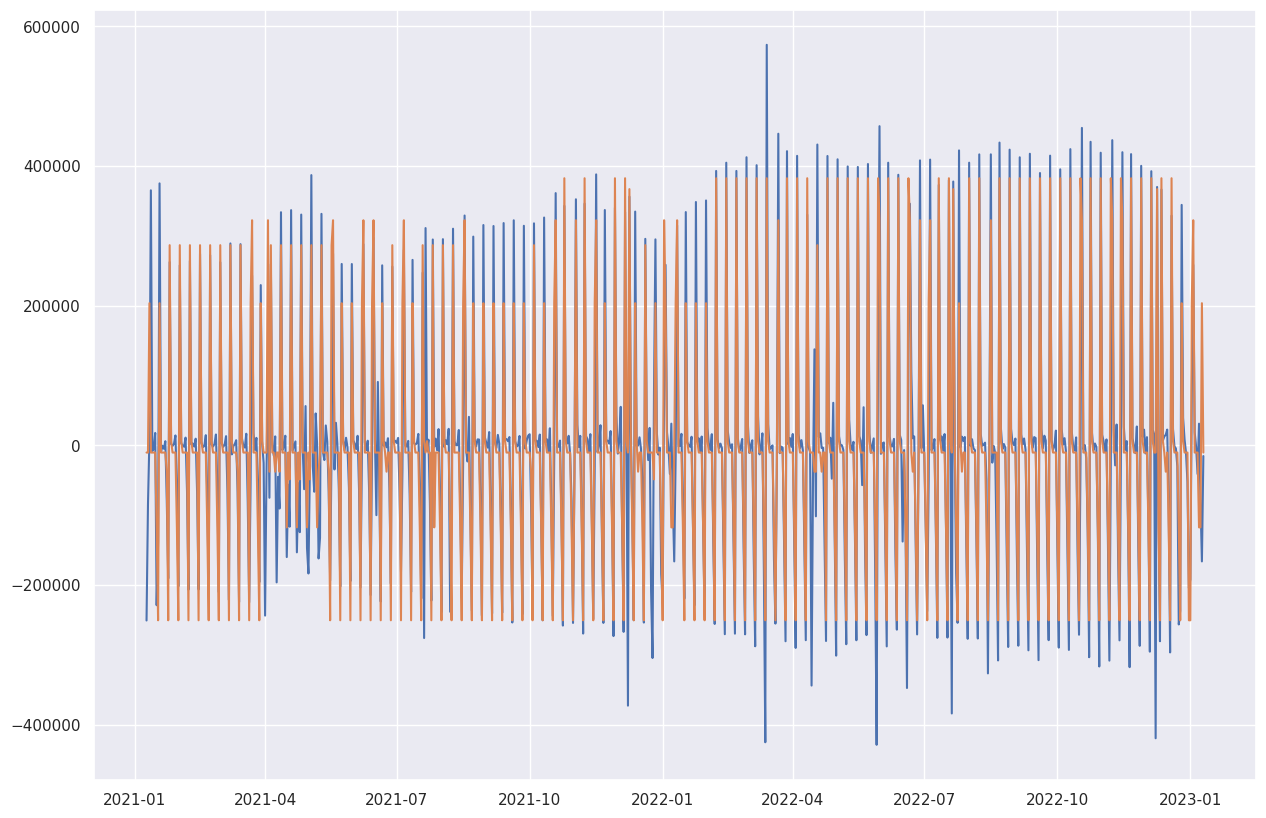

In [ ]:
indices_full_Pas=PasasinTend.index

targetjoint=np.concatenate((yPas_train_full,yPas_test))
predictionjoint=np.concatenate((train_prediction,test_prediction))

d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indices_full_Pas[7:])

plt.plot(ObsvsPred)

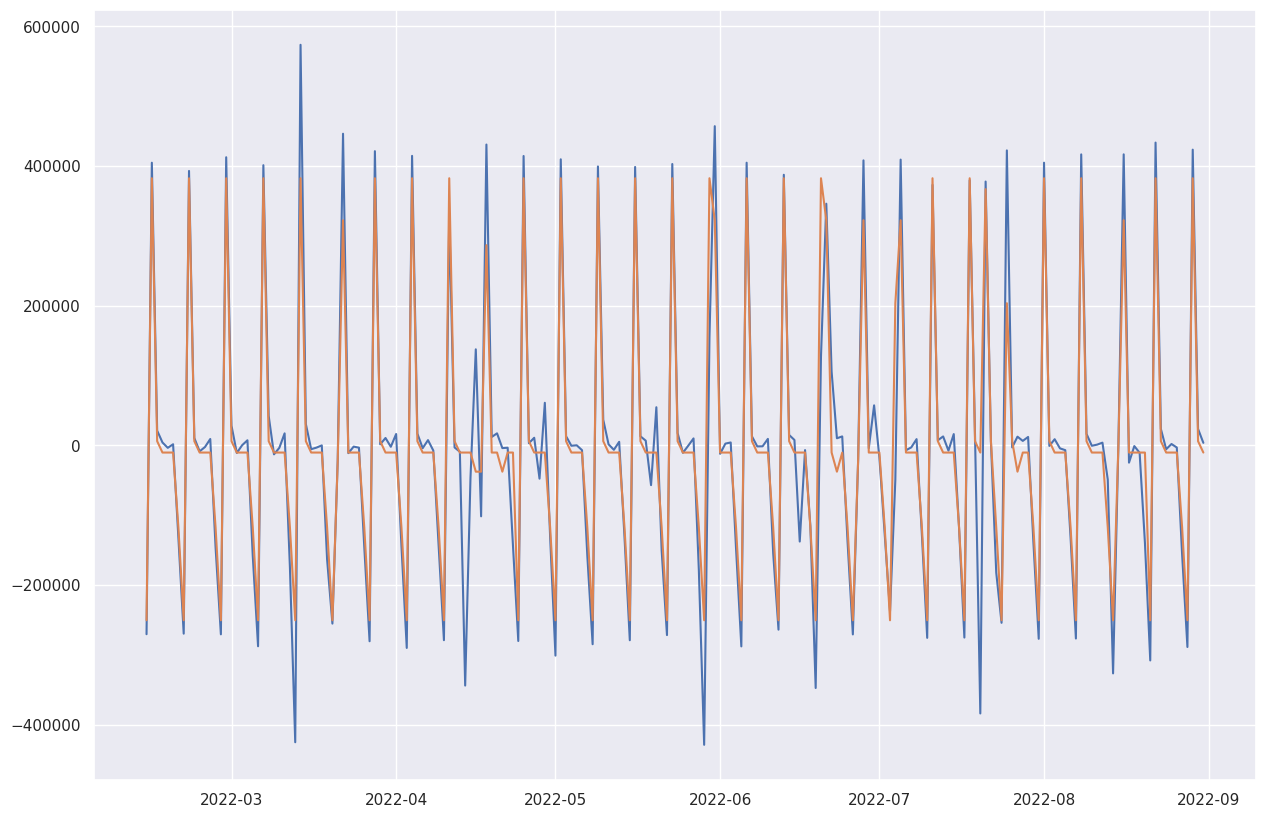

In [ ]:
plt.plot(ObsvsPred.iloc[400:600])

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(Pasajeros, trend='add', seasonal='add',initialization_method="estimated",use_boxcox=False).fit()
plt.figure(figsize=(16, 5.5))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Figure size 1600x550 with 0 Axes>

<Figure size 1600x550 with 0 Axes>

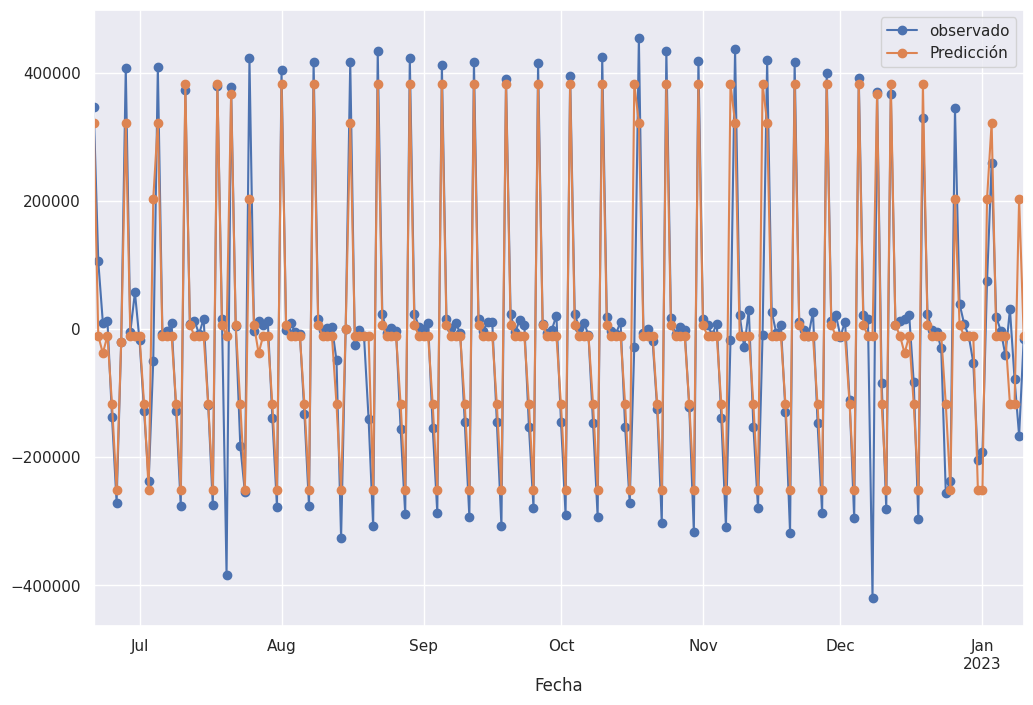

In [ ]:
PredPruArboles=ObsvsPred['Predicción'][520:].values+fit1.level[528:].values
PredArboles=ObsvsPred[528:]
ax = PredArboles.plot( marker="o", figsize=(12,8))

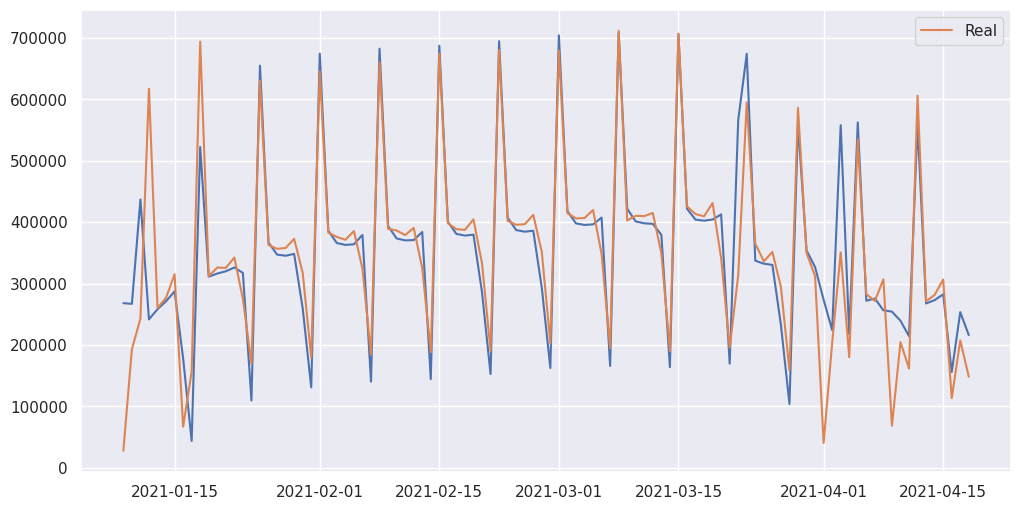

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)
fig, ax = plt.subplots(figsize=(12, 6))
PredEyVArboles=FitModelo1 = ObsvsPred['Predicción']+fit1.level[8:].values
FitModelo2 = ObsvsPred['observado']+fit1.level[8:].values
plt.plot(FitModelo1[0:100])
plt.plot(FitModelo2[0:100],label='Real')
ax.legend()

In [ ]:
ypredes=ObsvsPred['Predicción'][520:]+fit1.level[528:].values
y_testes= ObsvsPred['observado'][520:]+fit1.level[528:].values
RECM = math.sqrt(mean_squared_error(y_testes, ypredes))
RECM

82519.38054701452

## Análisis de residuales

<ipython-input-26-195bf4de9ab5>:6: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  plot_acf(ResidualesEyVArboles,lags=32, unbiased=False)


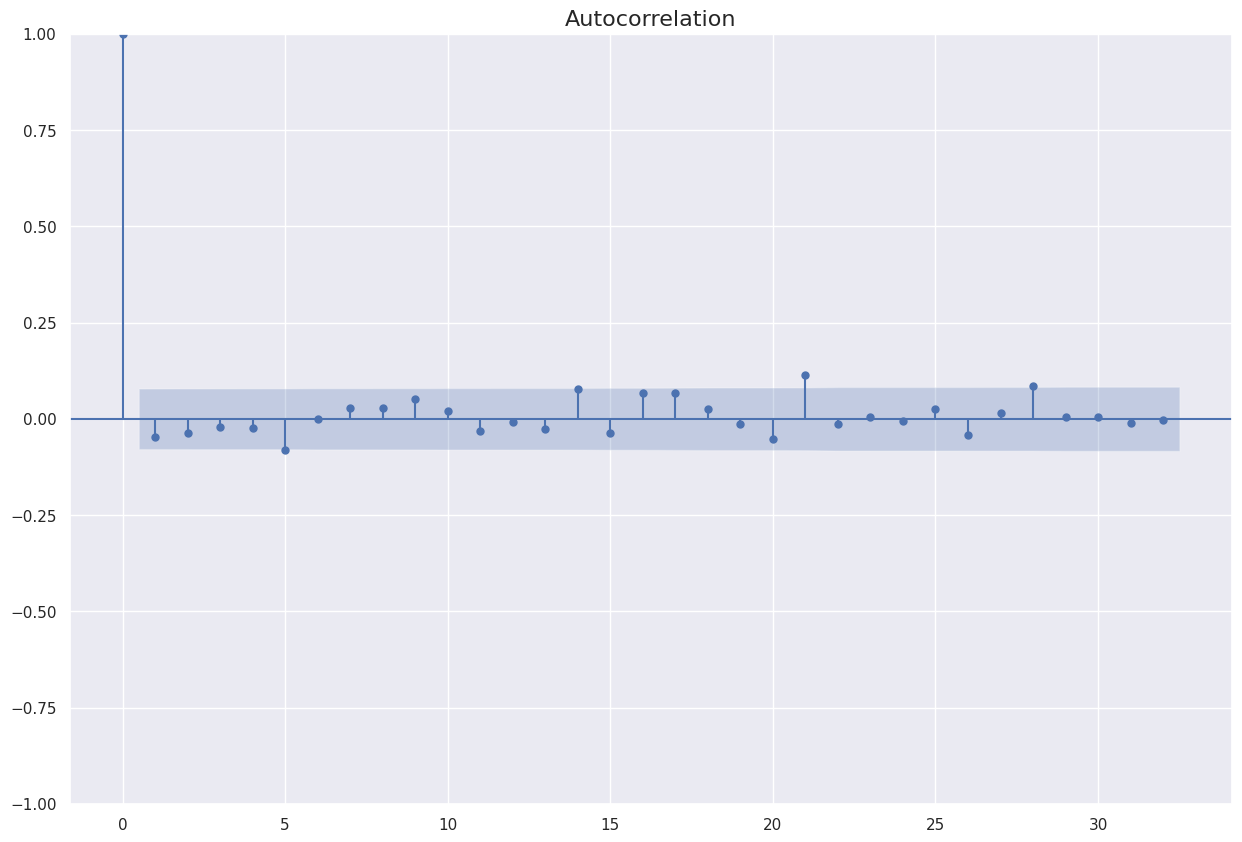

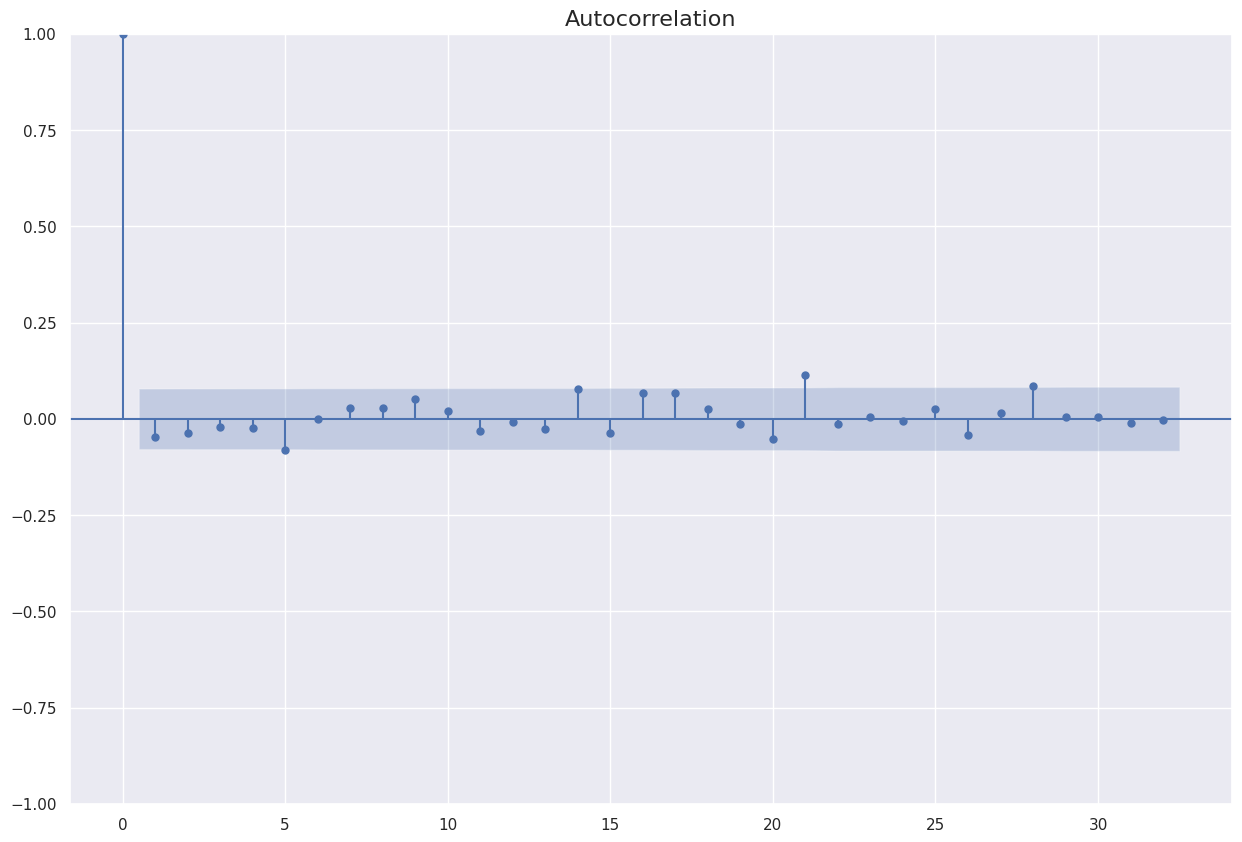

In [ ]:
ResidualesPruArboles=y_testes-np.ravel(ypredes)
ypred=train_prediction
ypredes=(ypred+fit1.level[0:622].values)
y_testes=(np.ravel(yPas_train_full)+fit1.level[:622].values)
ResidualesEyVArboles=y_testes-np.ravel(ypredes)
plot_acf(ResidualesEyVArboles,lags=32, unbiased=False)
plt.show()

In [ ]:
ResidualesEyVArboles.shape

(622,)

**Prueba Ljungbox**

In [ ]:
statistic_lb2 = sm.stats.diagnostic.acorr_ljungbox(ResidualesEyVArboles, lags=31, boxpierce=False,return_df=True)
statistic_lb2 #No son autocorrelacionados

,lb_stat,lb_pvalue
1,1.384578,0.239323
2,2.238983,0.326446
3,2.548866,0.466525
4,2.871865,0.579492
5,6.963309,0.223383
6,6.964982,0.324098
7,7.449210,0.383651
8,7.924320,0.440898
9,9.523170,0.390446
10,9.810694,0.457256


<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Residuales')

Text(0, 0.5, 'Error')

Text(0.5, 0, 'Index')

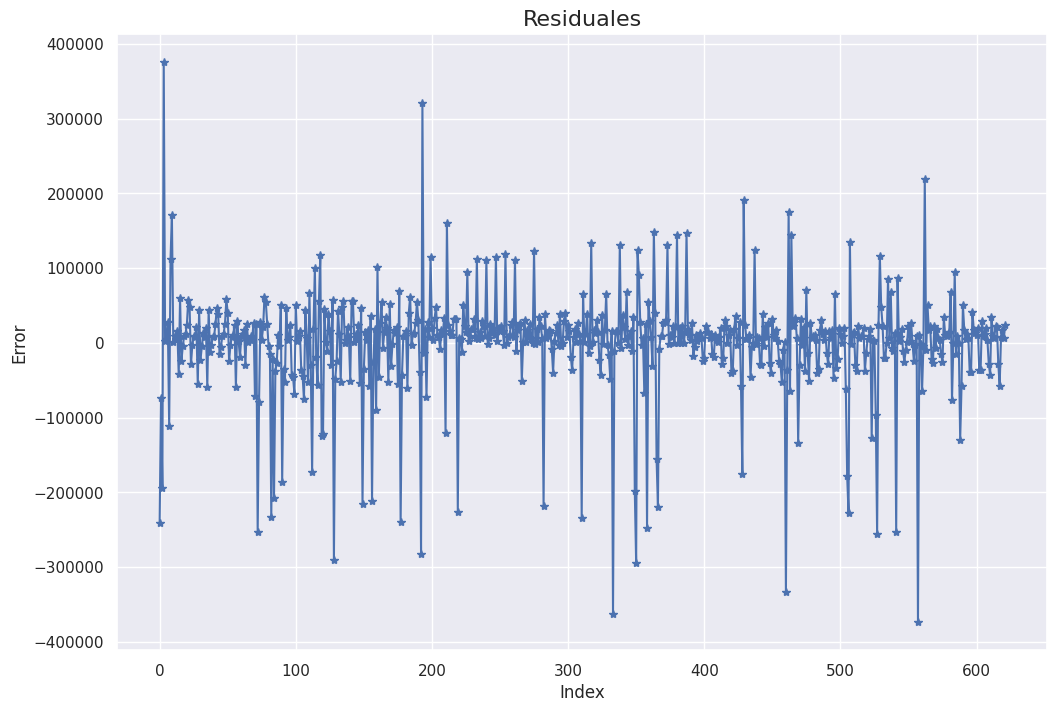

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(ResidualesEyVArboles.size), ResidualesEyVArboles, linestyle='-', marker='*', color='b')
plt.title('Residuales')
plt.ylabel('Error')
plt.xlabel('Index')